In [ ]:
!mkdir ../lookalikeceleb/

/usr/local/anaconda/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


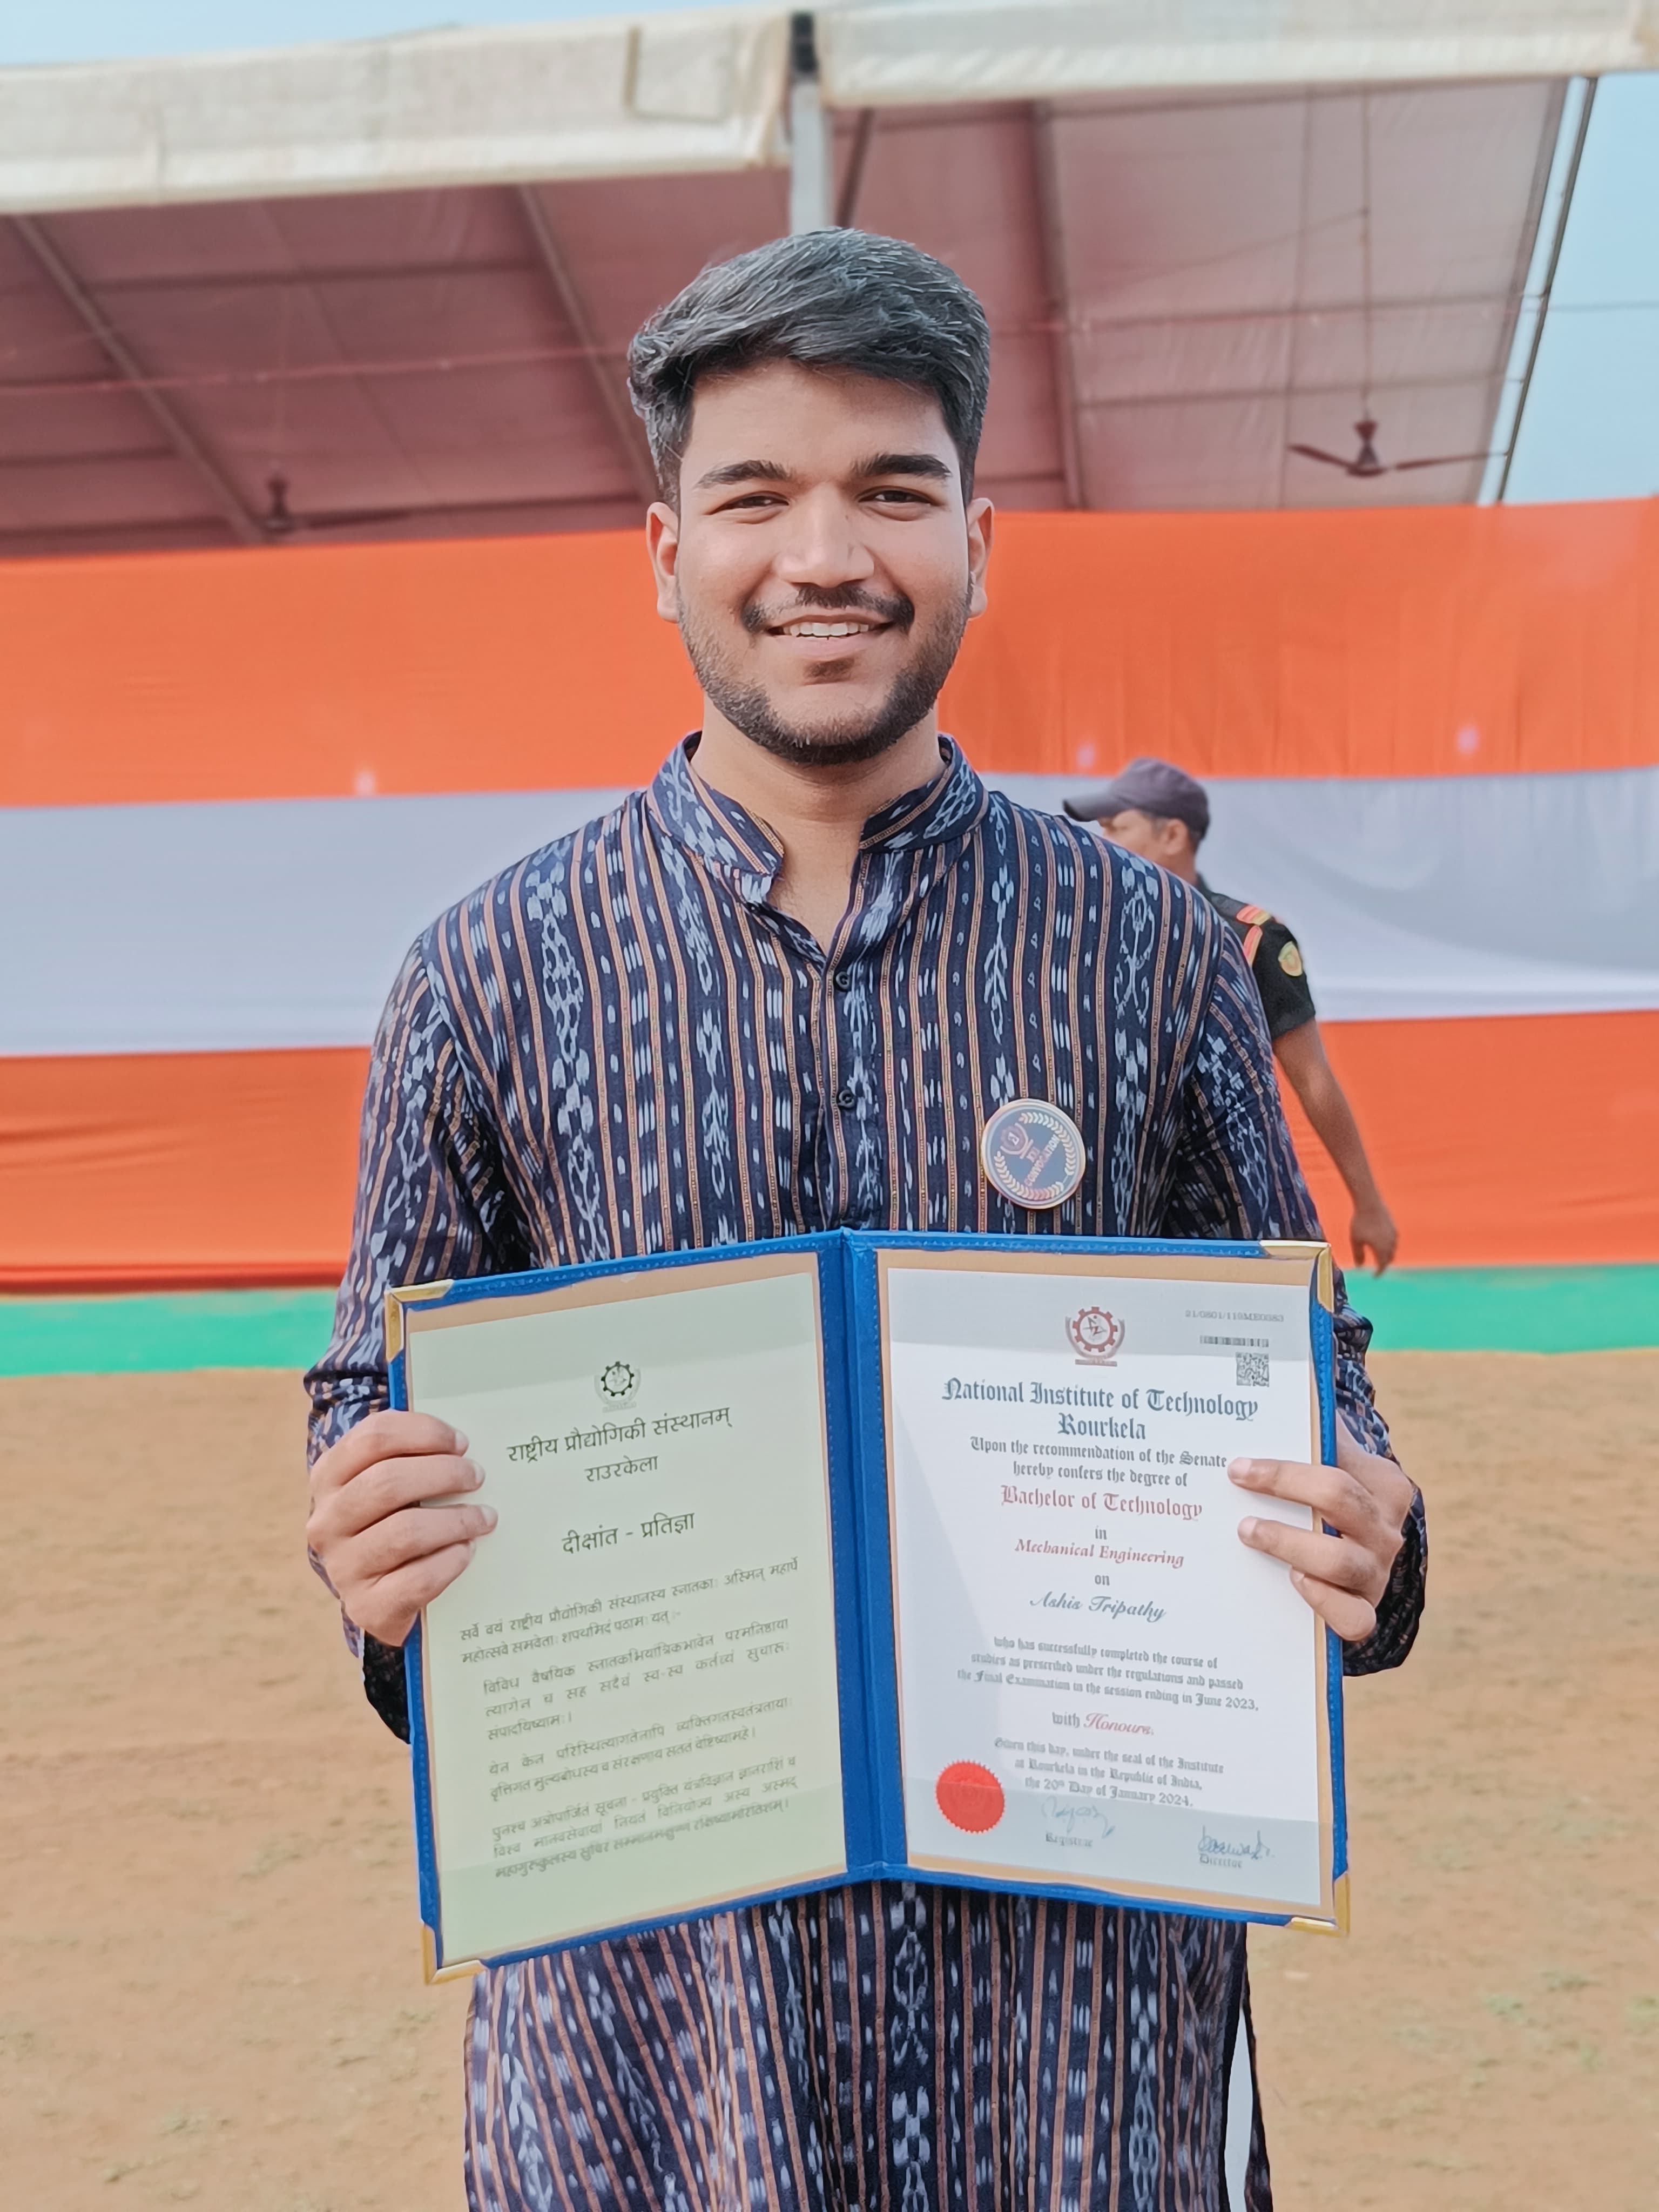

In [1]:
import face_recognition
import os
import numpy as np
from IPython.display import Image
def load_images(known_images_dir):
    known_encodings=[]
    known_images=[]
    for file in os.listdir(known_images_dir):
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir,filename))
        enc = face_recognition.face_encodings(image)
        if len (enc)>0:
            known_encodings.append(enc[0])
            known_images.append(filename)
    return (known_encodings,known_images)
def calculate_face_distance(known_encodings,unknown_img_path,cutoff=0.5,num_results=4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    face_distances = face_recognition.face_distance(known_encodings,image_to_test_encoding)
    return(unknown_img_path,known_images[face_distances.argmin()])
known_encodings, known_images = load_images("/cxldata/projects/lookalikeceleb/images")
original_image = "../lookalikeceleb/myimage.jpg"
Image(filename=original_image)

Hey, you look like Girish Karnad!


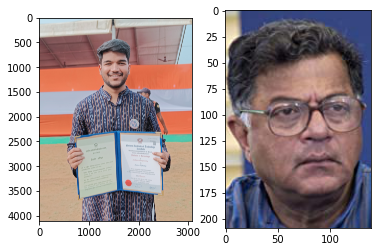

In [5]:
matching_image=calculate_face_distance(known_encodings,original_image)[1]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('/cxldata/projects/lookalikeceleb/images/' + matching_image)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);

print('Hey, you look like ' + os.path.splitext(matching_image)[0] + '!')